processed datasets
* source (European): https://drive.google.com/file/d/1kQp0OH7uOWj9uFI33-2o3UIdWyPi7xrr/view?usp=drive_link
* target (South Asian): https://drive.google.com/file/d/1saCEiiAUhyZ1gO-Xo_xFO0AC_eKcrNbH/view?usp=drive_link

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

##source

In [ ]:
s = pd.read_csv('source_processed.csv')

In [ ]:
s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19146 entries, 0 to 19145
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     19146 non-null  int64  
 1   beta           19146 non-null  float64
 2   eaf            19146 non-null  float64
 3   maf            19146 non-null  float64
 4   position       19146 non-null  int64  
 5   stdErr         19146 non-null  float64
 6   zScore         19146 non-null  float64
 7   alt_C          19146 non-null  int64  
 8   alt_G          19146 non-null  int64  
 9   alt_T          19146 non-null  int64  
 10  minorAllele_C  19146 non-null  int64  
 11  minorAllele_G  19146 non-null  int64  
 12  minorAllele_T  19146 non-null  int64  
 13  logP           19146 non-null  float64
 14  prs_component  19145 non-null  float64
dtypes: float64(7), int64(8)
memory usage: 2.2 MB


In [ ]:
s.head()

,Unnamed: 0,beta,eaf,maf,position,stdErr,zScore,alt_C,alt_G,alt_T,minorAllele_C,minorAllele_G,minorAllele_T,logP,prs_component
0,0,0.20847,0.818773,0.181227,99326756,0.044504,4.684298,0,1,0,0,0,1,5.516256,0.170690
1,1,0.16144,0.395911,0.395911,108227879,0.035517,4.545429,0,1,0,0,1,0,5.229774,0.063916
2,2,-0.16410,0.319393,0.319393,99321471,0.037596,-4.364826,0,1,0,0,1,0,4.868413,-0.052412
3,3,0.18319,0.215747,0.215747,85738944,0.042367,4.323884,0,0,1,0,0,1,4.788612,0.039523
4,4,0.19737,0.174115,0.174115,34803165,0.045921,4.298034,0,1,0,0,1,0,4.738404,0.034365


In [ ]:
s.corr()

,Unnamed: 0,beta,eaf,maf,position,stdErr,zScore,alt_C,alt_G,alt_T,minorAllele_C,minorAllele_G,minorAllele_T,logP,prs_component
Unnamed: 0,1.000000,0.000053,-0.058497,-0.039121,0.067389,0.023851,-0.186670,0.002634,-0.013712,0.004029,-0.000484,-0.002979,-0.000012,-0.202604,-0.009066
beta,0.000053,1.000000,0.020738,0.013145,0.006694,-0.014580,0.249574,-0.003223,0.008841,-0.001247,-0.003299,0.006817,-0.000355,0.011330,0.164488
eaf,-0.058497,0.020738,1.000000,0.610994,-0.027325,-0.384973,0.146618,0.045177,0.052004,-0.045809,0.019554,0.016883,-0.015388,0.136681,0.079314
maf,-0.039121,0.013145,0.610994,1.000000,-0.009389,-0.482952,0.146588,0.028525,0.039082,-0.025534,0.022751,0.027127,-0.019389,0.198732,-0.003699
position,0.067389,0.006694,-0.027325,-0.009389,1.000000,0.017785,0.010404,-0.003202,0.003889,-0.004772,-0.000848,0.002152,-0.006865,-0.098636,0.010023
stdErr,0.023851,-0.014580,-0.384973,-0.482952,0.017785,1.000000,-0.093892,-0.034919,-0.022658,0.026502,-0.028774,-0.013670,0.019821,-0.152369,0.031736
zScore,-0.186670,0.249574,0.146618,0.146588,0.010404,-0.093892,1.000000,-0.002649,0.025769,-0.009823,-0.012242,0.007610,0.003452,0.364468,0.204456
alt_C,0.002634,-0.003223,0.045177,0.028525,-0.003202,-0.034919,-0.002649,1.000000,-0.305429,-0.331670,0.695063,-0.270461,-0.109000,0.012341,-0.001251
alt_G,-0.013712,0.008841,0.052004,0.039082,0.003889,-0.022658,0.025769,-0.305429,1.000000,-0.335275,-0.269451,0.700771,-0.293773,0.019825,0.010804
alt_T,0.004029,-0.001247,-0.045809,-0.025534,-0.004772,0.026502,-0.009823,-0.331670,-0.335275,1.000000,-0.132250,-0.279644,0.735543,-0.018135,-0.004645


##logistic regression for binary target creation

prs frequency distribution

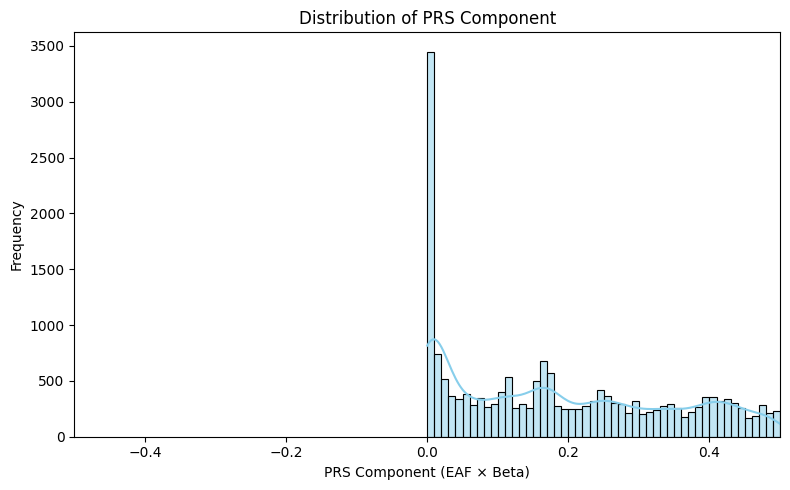

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.histplot(s["maf"], kde=True, bins=50, color='skyblue')
plt.title("Distribution of PRS Component")
plt.xlabel("PRS Component (EAF × Beta)")
plt.ylabel("Frequency")

plt.xlim(-0.5, 0.5)
plt.tight_layout()
plt.show()

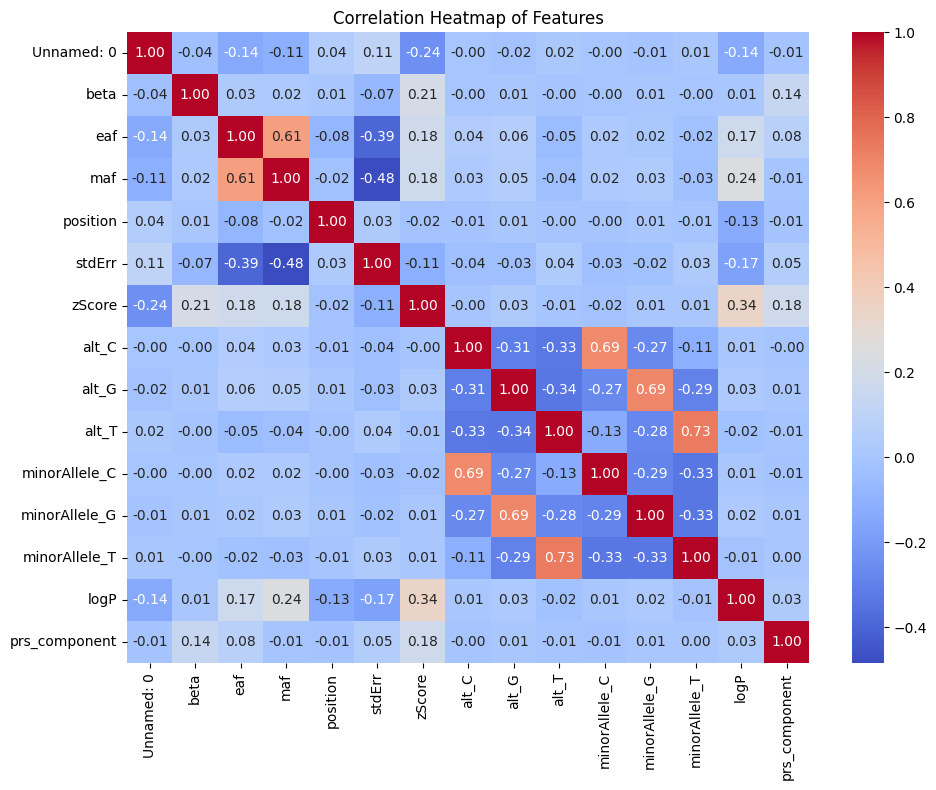

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(s.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Features")
plt.tight_layout()
plt.show()

In [ ]:
s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30715 entries, 0 to 30714
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     30715 non-null  int64  
 1   beta           30715 non-null  float64
 2   eaf            30715 non-null  float64
 3   maf            30715 non-null  float64
 4   position       30715 non-null  int64  
 5   stdErr         30715 non-null  float64
 6   zScore         30715 non-null  float64
 7   alt_C          30715 non-null  int64  
 8   alt_G          30715 non-null  int64  
 9   alt_T          30715 non-null  int64  
 10  minorAllele_C  30715 non-null  int64  
 11  minorAllele_G  30715 non-null  int64  
 12  minorAllele_T  30715 non-null  int64  
 13  logP           30715 non-null  float64
 14  prs_component  30715 non-null  float64
dtypes: float64(7), int64(8)
memory usage: 3.5 MB


In [ ]:
s.drop(columns=['Unnamed: 0'], inplace=True)

checking for NaN values before applying logistic regression for binary target variable creation

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression


X = s.drop(columns=['prs_component'], errors='ignore')


s['t2d_binary'] = (s['prs_component'] > s['prs_component'].median()).astype(int)
y = s['t2d_binary']


X = X.replace([np.inf, -np.inf], np.nan)


print("NaNs per column:\n", X.isna().sum())


X_clean = X.dropna()
y_clean = y.loc[X_clean.index]


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_clean)


model = LogisticRegression(max_iter=1000)
model.fit(X_scaled, y_clean)

s.loc[X_clean.index, 't2d_predicted'] = model.predict(X_scaled)


NaNs per column:
 beta             0
eaf              0
maf              0
position         0
stdErr           0
zScore           0
alt_C            0
alt_G            0
alt_T            0
minorAllele_C    0
minorAllele_G    0
minorAllele_T    0
logP             0
dtype: int64


In [ ]:
s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19146 entries, 0 to 19145
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   beta           19146 non-null  float64
 1   eaf            19146 non-null  float64
 2   maf            19146 non-null  float64
 3   position       19146 non-null  int64  
 4   stdErr         19146 non-null  float64
 5   zScore         19146 non-null  float64
 6   alt_C          19146 non-null  int64  
 7   alt_G          19146 non-null  int64  
 8   alt_T          19146 non-null  int64  
 9   minorAllele_C  19146 non-null  int64  
 10  minorAllele_G  19146 non-null  int64  
 11  minorAllele_T  19146 non-null  int64  
 12  logP           19146 non-null  float64
 13  prs_component  19145 non-null  float64
 14  t2d_binary     19146 non-null  int64  
 15  t2d_predicted  19146 non-null  float64
dtypes: float64(8), int64(8)
memory usage: 2.3 MB


applying logistic regression for creating binary target variable

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler




X = s.drop(columns=['prs_component'], errors='ignore')


X = X.replace([np.inf, -np.inf], np.nan)
X = X.dropna()

y = (s.loc[X.index, 'prs_component'] > s['prs_component'].median()).astype(int)


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


model = LogisticRegression(max_iter=1000)
model.fit(X_scaled, y)


s.loc[X.index, 't2d'] = model.predict(X_scaled)
s['t2d'] = s['t2d'].fillna(0).astype(int)


print(s['t2d'].value_counts())


t2d
0    9574
1    9572
Name: count, dtype: int64


classification metrics

In [ ]:

print(f"Accuracy: {accuracy_score(y, y_pred):.4f}")


print("\nClassification Report:\n", classification_report(y, y_pred))

print(f"ROC AUC: {roc_auc_score(y, y_prob):.4f}")


NameError: name 'accuracy_score' is not defined

confusion matrix for classification

In [ ]:
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


NameError: name 'confusion_matrix' is not defined

<Figure size 500x400 with 0 Axes>

distribution of classified two risk groups

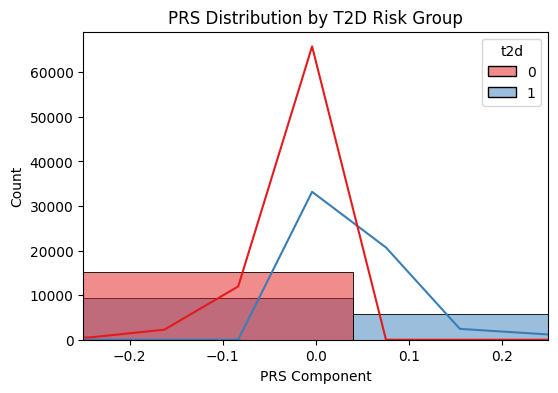

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(data=s, x='prs_component', hue='t2d', kde=True, palette='Set1', bins=50)
plt.title("PRS Distribution by T2D Risk Group")
plt.xlabel("PRS Component")
plt.ylabel("Count")
plt.xlim(-0.25, 0.25)
plt.show()


distribution of numeric features agains risk groups

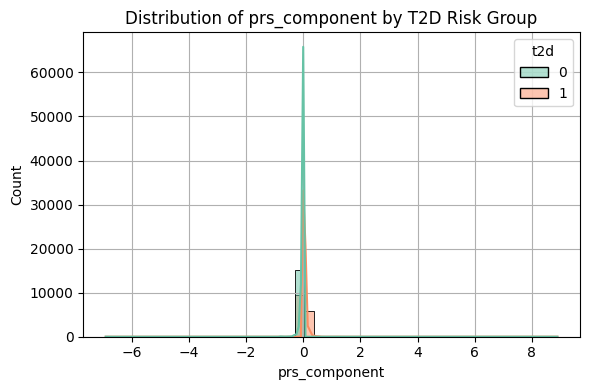

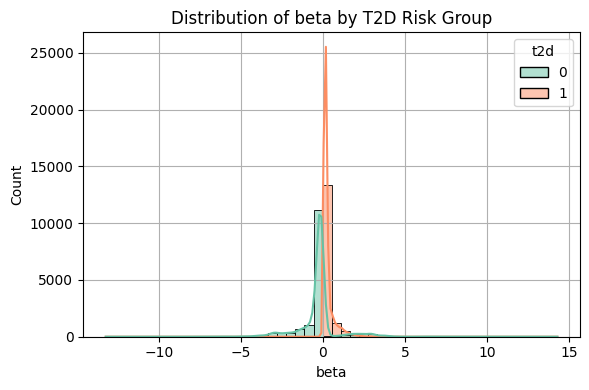

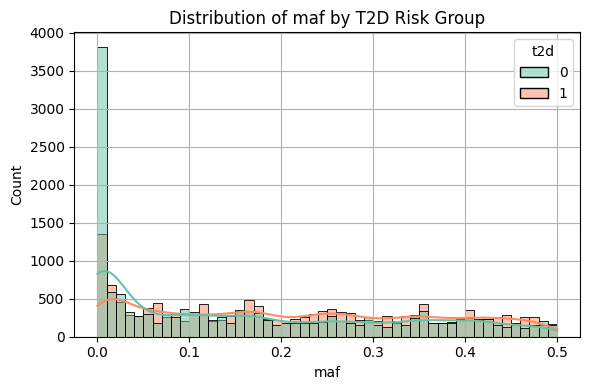

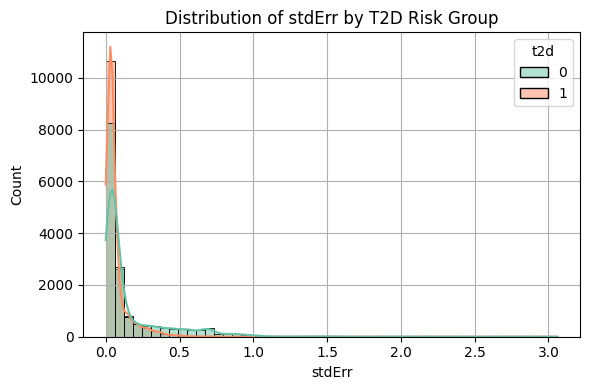

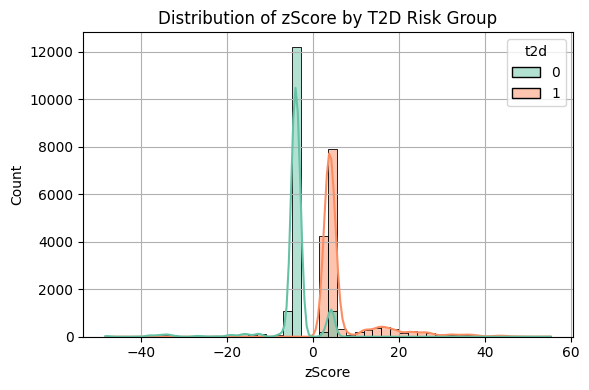

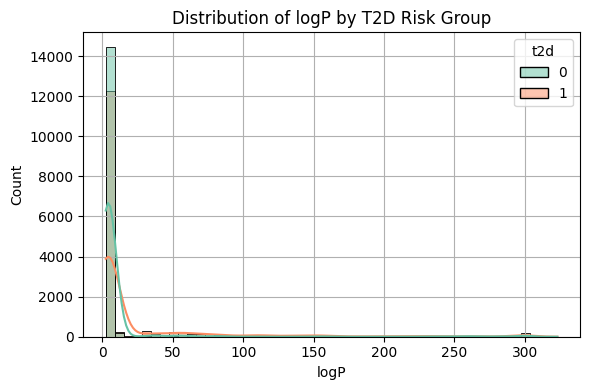

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

features_to_plot = ['prs_component', 'beta', 'maf', 'stdErr', 'zScore', 'logP']

for feature in features_to_plot:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=s, x=feature, hue='t2d', kde=True, bins=50, palette='Set2')
    plt.title(f'Distribution of {feature} by T2D Risk Group')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


updated heatmap

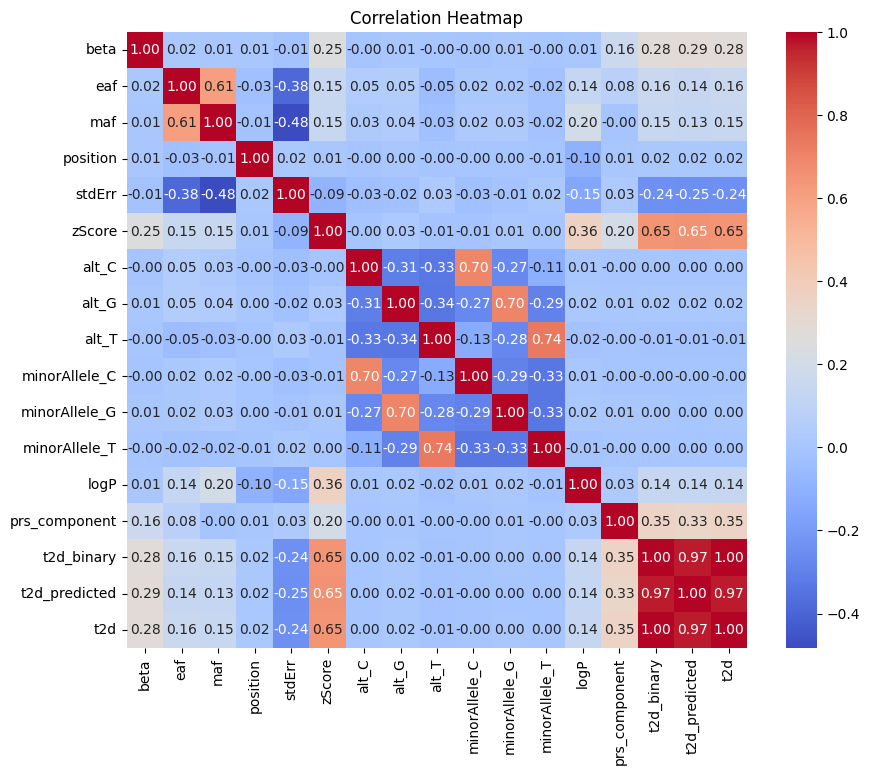

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(s.corr(numeric_only=True), cmap='coolwarm', annot=True, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


In [ ]:
s.head(50)

,beta,eaf,maf,position,stdErr,zScore,alt_C,alt_G,alt_T,minorAllele_C,minorAllele_G,minorAllele_T,logP,prs_component,t2d_binary,t2d_predicted,t2d
0,0.20847,0.818773,0.181227,99326756,0.044504,4.684298,0,1,0,0,0,1,5.516256,0.170690,1,1.0,1
1,0.16144,0.395911,0.395911,108227879,0.035517,4.545429,0,1,0,0,1,0,5.229774,0.063916,1,1.0,1
2,-0.16410,0.319393,0.319393,99321471,0.037596,-4.364826,0,1,0,0,1,0,4.868413,-0.052412,0,0.0,0
3,0.18319,0.215747,0.215747,85738944,0.042367,4.323884,0,0,1,0,0,1,4.788612,0.039523,1,1.0,1
4,0.19737,0.174115,0.174115,34803165,0.045921,4.298034,0,1,0,0,1,0,4.738404,0.034365,1,1.0,1
5,-0.18849,0.199195,0.199195,20930038,0.044208,-4.263708,1,0,0,1,0,0,4.672151,-0.037546,0,0.0,0
6,-0.14784,0.544776,0.455224,114229139,0.034862,-4.240721,0,0,0,0,1,0,4.628009,-0.080540,0,0.0,0
7,-0.15171,0.358426,0.358426,33045558,0.035785,-4.239486,0,0,0,0,0,0,4.625545,-0.054377,0,0.0,0
8,-0.20197,0.161400,0.161400,5958615,0.047844,-4.221428,0,0,1,0,0,1,4.591150,-0.032598,0,0.0,0
9,0.17349,0.236679,0.236679,20030738,0.041177,4.213274,0,1,0,0,1,0,4.575576,0.041061,1,1.0,1


In [ ]:
s.drop(columns=['t2d','t2d_binary'], inplace=True)

In [ ]:
s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30715 entries, 0 to 30714
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   beta           30715 non-null  float64
 1   eaf            30715 non-null  float64
 2   maf            30715 non-null  float64
 3   position       30715 non-null  int64  
 4   stdErr         30715 non-null  float64
 5   zScore         30715 non-null  float64
 6   alt_C          30715 non-null  int64  
 7   alt_G          30715 non-null  int64  
 8   alt_T          30715 non-null  int64  
 9   minorAllele_C  30715 non-null  int64  
 10  minorAllele_G  30715 non-null  int64  
 11  minorAllele_T  30715 non-null  int64  
 12  logP           30715 non-null  float64
 13  prs_component  30715 non-null  float64
 14  t2d_predicted  30714 non-null  float64
dtypes: float64(8), int64(7)
memory usage: 3.5 MB


In [ ]:
s.to_csv('source_stratified.csv')

In [ ]:
s['t2d_predicted'].value_counts()

,count
t2d_predicted,
1.0,15551
0.0,15163


##target stratification

In [ ]:
t = pd.read_csv('target_processed.csv')

In [ ]:
t.drop(columns=['Unnamed: 0'], inplace=True)

In [ ]:
t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9463 entries, 0 to 9462
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   beta           9463 non-null   float64
 1   eaf            9463 non-null   float64
 2   maf            9463 non-null   float64
 3   position       9463 non-null   int64  
 4   stdErr         9463 non-null   float64
 5   zScore         9463 non-null   float64
 6   alt_C          9463 non-null   bool   
 7   alt_G          9463 non-null   bool   
 8   alt_T          9463 non-null   bool   
 9   minorAllele_C  9463 non-null   bool   
 10  minorAllele_G  9463 non-null   bool   
 11  minorAllele_T  9463 non-null   bool   
 12  logP           9463 non-null   float64
 13  prs_component  9463 non-null   float64
dtypes: bool(6), float64(7), int64(1)
memory usage: 647.0 KB


aplyying logistic regression

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler


X = t.drop(columns=['prs_component'], errors='ignore')


X = X.replace([np.inf, -np.inf], np.nan)
X = X.dropna()

y = (t.loc[X.index, 'prs_component'] > t['prs_component'].median()).astype(int)


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

model = LogisticRegression(max_iter=1000)
model.fit(X_scaled, y)

t.loc[X.index, 't2d'] = model.predict(X_scaled)
t['t2d'] = t['t2d'].fillna(0).astype(int)


print(t['t2d'].value_counts())


t2d
0    4733
1    4730
Name: count, dtype: int64


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns


X = t.drop(columns=['Unnamed: 0', 'prs_component', 't2d'], errors='ignore')
X = X.replace([np.inf, -np.inf], np.nan).dropna()
y = t.loc[X.index, 't2d']


X_scaled = scaler.fit_transform(X)


y_prob = model.predict_proba(X_scaled)[:, 1]
y_pred = model.predict(X_scaled)


metrics report

In [ ]:

print(f"Accuracy: {accuracy_score(y, y_pred):.4f}")


print("\nClassification Report:\n", classification_report(y, y_pred))

print(f"ROC AUC: {roc_auc_score(y, y_prob):.4f}")

Accuracy: 1.0000

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4733
           1       1.00      1.00      1.00      4730

    accuracy                           1.00      9463
   macro avg       1.00      1.00      1.00      9463
weighted avg       1.00      1.00      1.00      9463

ROC AUC: 1.0000


confusion matrix

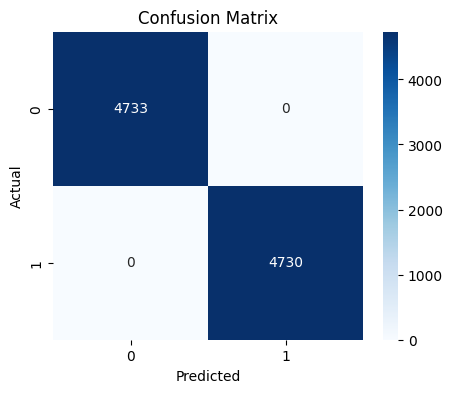

In [ ]:
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9463 entries, 0 to 9462
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   beta           9463 non-null   float64
 1   eaf            9463 non-null   float64
 2   maf            9463 non-null   float64
 3   position       9463 non-null   int64  
 4   stdErr         9463 non-null   float64
 5   zScore         9463 non-null   float64
 6   alt_C          9463 non-null   bool   
 7   alt_G          9463 non-null   bool   
 8   alt_T          9463 non-null   bool   
 9   minorAllele_C  9463 non-null   bool   
 10  minorAllele_G  9463 non-null   bool   
 11  minorAllele_T  9463 non-null   bool   
 12  logP           9463 non-null   float64
 13  prs_component  9463 non-null   float64
 14  t2d            9463 non-null   int64  
dtypes: bool(6), float64(7), int64(2)
memory usage: 720.9 KB


distribution of two risk groups

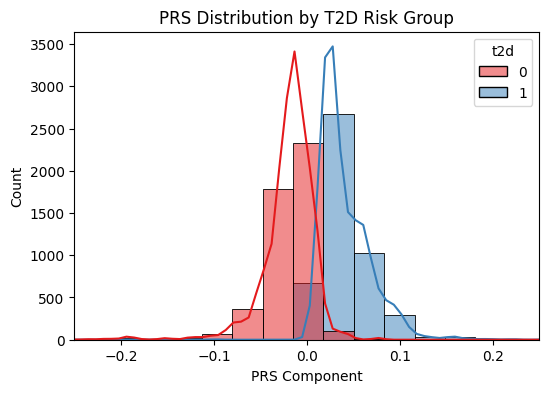

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(data=t, x='prs_component', hue='t2d', kde=True, palette='Set1', bins=50)
plt.title("PRS Distribution by T2D Risk Group")
plt.xlabel("PRS Component")
plt.ylabel("Count")
plt.xlim(-0.25, 0.25)
plt.show()

distribution of numeric features against two risk groups

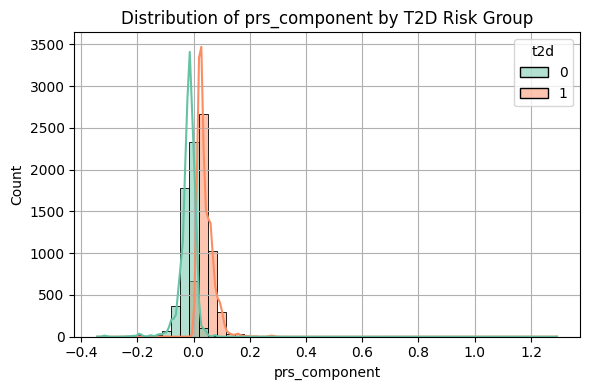

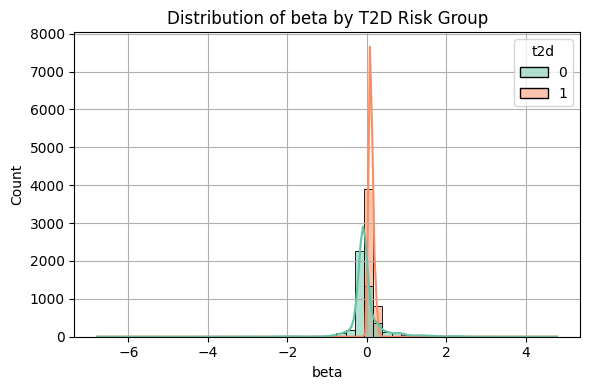

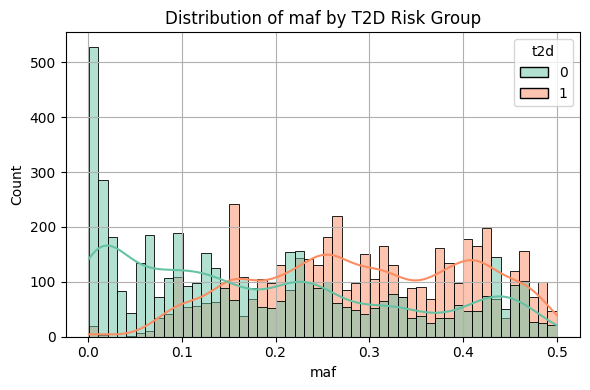

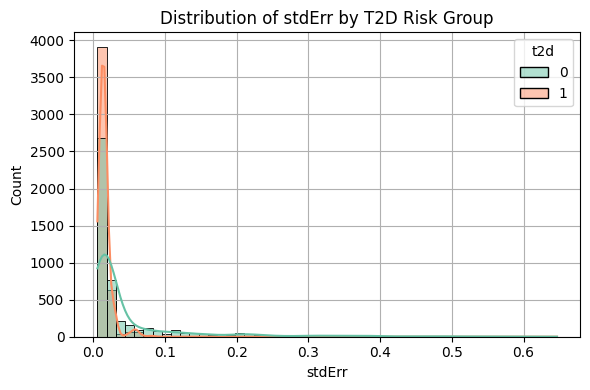

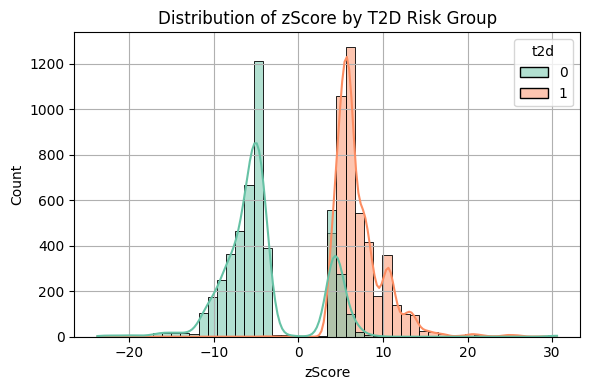

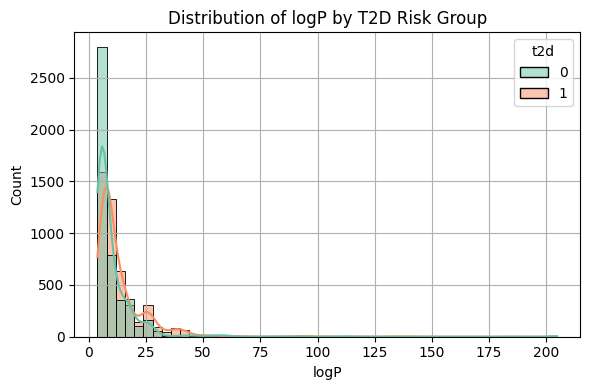

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


features_to_plot = ['prs_component', 'beta', 'maf', 'stdErr', 'zScore', 'logP']

for feature in features_to_plot:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=t, x=feature, hue='t2d', kde=True, bins=50, palette='Set2')
    plt.title(f'Distribution of {feature} by T2D Risk Group')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


updated heatmap

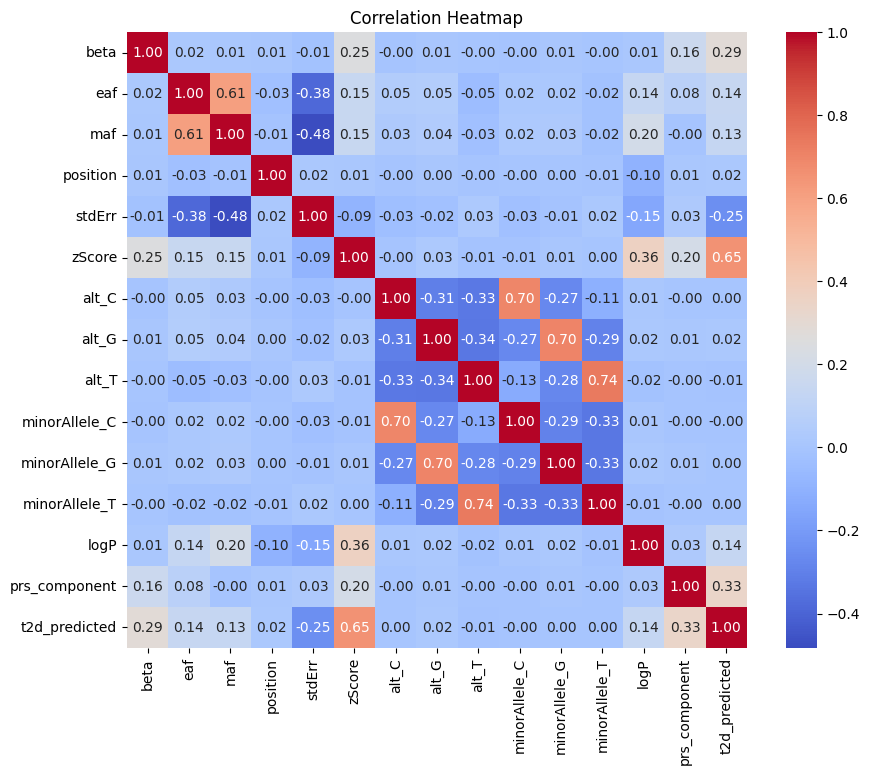

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(s.corr(numeric_only=True), cmap='coolwarm', annot=True, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30715 entries, 0 to 30714
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   beta           30715 non-null  float64
 1   eaf            30715 non-null  float64
 2   maf            30715 non-null  float64
 3   position       30715 non-null  int64  
 4   stdErr         30715 non-null  float64
 5   zScore         30715 non-null  float64
 6   alt_C          30715 non-null  int64  
 7   alt_G          30715 non-null  int64  
 8   alt_T          30715 non-null  int64  
 9   minorAllele_C  30715 non-null  int64  
 10  minorAllele_G  30715 non-null  int64  
 11  minorAllele_T  30715 non-null  int64  
 12  logP           30715 non-null  float64
 13  prs_component  30715 non-null  float64
 14  t2d_predicted  30714 non-null  float64
dtypes: float64(8), int64(7)
memory usage: 3.5 MB


In [ ]:
t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9463 entries, 0 to 9462
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   beta           9463 non-null   float64
 1   eaf            9463 non-null   float64
 2   maf            9463 non-null   float64
 3   position       9463 non-null   int64  
 4   stdErr         9463 non-null   float64
 5   zScore         9463 non-null   float64
 6   alt_C          9463 non-null   bool   
 7   alt_G          9463 non-null   bool   
 8   alt_T          9463 non-null   bool   
 9   minorAllele_C  9463 non-null   bool   
 10  minorAllele_G  9463 non-null   bool   
 11  minorAllele_T  9463 non-null   bool   
 12  logP           9463 non-null   float64
 13  prs_component  9463 non-null   float64
 14  t2d            9463 non-null   int64  
dtypes: bool(6), float64(7), int64(2)
memory usage: 720.9 KB


In [ ]:
t.rename(columns={'t2d': 't2d_predicted'}, inplace=True)

In [ ]:
t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9463 entries, 0 to 9462
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   beta           9463 non-null   float64
 1   eaf            9463 non-null   float64
 2   maf            9463 non-null   float64
 3   position       9463 non-null   int64  
 4   stdErr         9463 non-null   float64
 5   zScore         9463 non-null   float64
 6   alt_C          9463 non-null   bool   
 7   alt_G          9463 non-null   bool   
 8   alt_T          9463 non-null   bool   
 9   minorAllele_C  9463 non-null   bool   
 10  minorAllele_G  9463 non-null   bool   
 11  minorAllele_T  9463 non-null   bool   
 12  logP           9463 non-null   float64
 13  prs_component  9463 non-null   float64
 14  t2d_predicted  9463 non-null   int64  
dtypes: bool(6), float64(7), int64(2)
memory usage: 720.9 KB


In [ ]:
t.to_csv('target_stratified.csv')